In [1]:
# Loading necessary libraries for the project
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Documents\\Semester 8\\IoT Domain Analyst\\Project\\Sleep_health_and_lifestyle_dataset.csv")


C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

# Removing all the NaN values
data.dropna(inplace=True)

# Getting the statistical summary
print(data.describe())

# Selecting features

data['Snoring'] = data['Snoring'].map({'Yes': 1.0, 'No': 0.0})
selected_features = ['Snoring', 'SPO2_Rate', 'Heart_Rate']
X = data[selected_features]

# Preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)


        Person_ID         Age  Sleep_Duration  Quality_of_Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical_Activity_Level  Stress_Level  Heart_Rate   Daily_Steps  \
count               374.000000    374.000000  374.000000    374.000000   
mean                 59.171123      5.385027   71.176471   6816.844920   
std                  20.830804      1.774526    5.274338   1617.915679   
min                  30.000000      3.000000   65.000000   3000.000000   
25%                  45.00

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

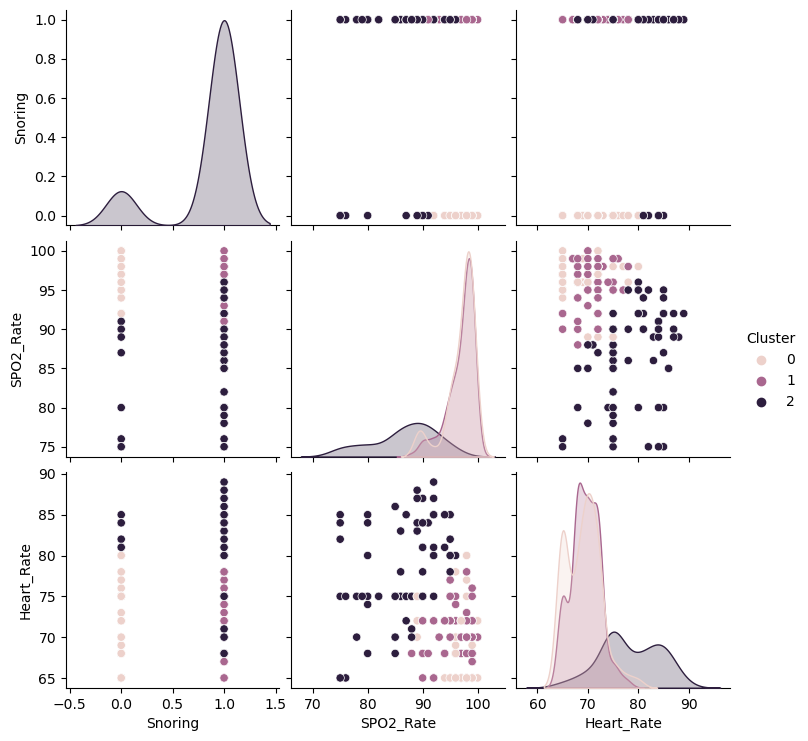

In [3]:

# Assigning clusters to data points
data['Cluster'] = kmeans.labels_

# Visualizing clusters
sns.pairplot(data=data, hue='Cluster', vars=selected_features)
plt.show()


In [4]:
# Evaluating the silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.523100436459549
